In [2]:
import numpy as np
from qiskit import *
from qiskit import QuantumRegister
from qiskit import Aer, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

def SUM():
    qSum = QuantumRegister(3)
    qSum_circ = QuantumCircuit(qSum, name = 'SUM')
    qSum_circ.cx(qSum[1], qSum[2])
    qSum_circ.cx(qSum[0], qSum[2])
    return qSum_circ.to_instruction()

def CARRY():
    qCarry = QuantumRegister(4)
    qCarry_circ = QuantumCircuit(qCarry, name = 'CARRY')
    qCarry_circ.ccx(qCarry[1], qCarry[2], qCarry[3])
    qCarry_circ.cx(qCarry[1], qCarry[2])
    qCarry_circ.ccx(qCarry[0], qCarry[2], qCarry[3])
    return qCarry_circ.to_instruction()

def rCARRY():
    qrCarry = QuantumRegister(4)
    qrCarry_circ = QuantumCircuit(qrCarry, name = 'rCARRY')
    qrCarry_circ.ccx(qrCarry[0], qrCarry[2], qrCarry[3])    
    qrCarry_circ.cx(qrCarry[1], qrCarry[2])
    qrCarry_circ.ccx(qrCarry[1], qrCarry[2], qrCarry[3])
    return qrCarry_circ.to_instruction()
    
SUM = SUM()
CARRY = CARRY()
rCARRY = rCARRY()

In [3]:
A = QuantumRegister(5,'a')
B = QuantumRegister(6,'b')
C = QuantumRegister(4,'c')
creg = ClassicalRegister(6)
cir = QuantumCircuit(A,B,C,creg)
cir.x(A[3])
cir.h(A[0])
cir.h(A[1])
cir.h(A[2])
cir.ccx(A[0],A[1],A[4])
cir.ccx(A[2],A[4],A[3])
cir.ccx(A[0],A[1],A[4])
cir.x(A[0])
cir.x(A[1])
cir.x(A[2])
cir.x(A[3])
cir.u(pi/2, 0, pi, A[0])
cir.u(pi/2, 0, 0, A[1])
cir.u(-pi/2, 0, pi, A[2])
cir.x(B[3])
cir.h(B[0])
cir.h(B[1])
cir.h(B[2])
cir.ccx(B[0],B[1],B[5])
cir.ccx(B[2],B[5],B[3])
cir.ccx(B[0],B[1],B[5])
cir.x(B[0])
cir.x(B[1])
cir.x(B[2])
cir.x(B[3])
cir.u(pi/2, 0, pi, B[0])
cir.u(pi/2, 0, 0, B[1])
cir.u(pi/2, 0, pi, B[2])
for i in range(3):
    cir.append(CARRY, [C[i], A[i], B[i], C[i+1]]) 
cir.append(CARRY, [C[3], A[3], B[3], B[4]]) 
cir.cx(A[3], B[3])
for i in range(3):
    cir.append(SUM, [C[3-i], A[3-i], B[3-i]])
    cir.append(rCARRY, [C[2-i], A[2-i], B[2-i], C[3-i]])
cir.append(SUM, [C[0], A[0], B[0]])
cir.draw()

┌───┐               ┌───┐ ┌────────────┐┌────────┐                    »
 a_0: ┤ H ├──■─────────■──┤ X ├─┤ U(π/2,0,π) ├┤1       ├────────────────────»
      ├───┤  │         │  ├───┤ ├────────────┤│        │┌────────┐          »
 a_1: ┤ H ├──■─────────■──┤ X ├─┤ U(π/2,0,0) ├┤        ├┤1       ├──────────»
      ├───┤  │         │  ├───┤┌┴────────────┤│        ││        │┌────────┐»
 a_2: ┤ H ├──┼────■────┼──┤ X ├┤ U(-π/2,0,π) ├┤        ├┤        ├┤1       ├»
      ├───┤  │  ┌─┴─┐  │  ├───┤└─────────────┘│        ││        ││        │»
 a_3: ┤ X ├──┼──┤ X ├──┼──┤ X ├───────────────┤        ├┤        ├┤        ├»
      └───┘┌─┴─┐└─┬─┘┌─┴─┐└───┘               │        ││        ││        │»
 a_4: ─────┤ X ├──■──┤ X ├────────────────────┤        ├┤        ├┤        ├»
      ┌───┐└───┘     └───┘┌───┐ ┌────────────┐│        ││        ││        │»
 b_0: ┤ H ├──■─────────■──┤ X ├─┤ U(π/2,0,π) ├┤2       ├┤        ├┤        ├»
      ├───┤  │         │  ├───┤ ├────────────┤│        ││        ││        │»
 b_1: ┤ H ├──■─────────■──┤ X ├─┤ U(π/2,0,0) ├┤  CARRY ├┤2       ├┤        ├»
      ├───┤  │         │  ├───┤ ├────────────┤│        ││        ││        │»
 b_2: ┤ H ├──┼────■────┼──┤ X ├─┤ U(π/2,0,π) ├┤        ├┤  CARRY ├┤2       ├»
      ├───┤  │  ┌─┴─┐  │  ├───┤ └────────────┘│        ││        ││        │»
 b_3: ┤ X ├──┼──┤ X ├──┼──┤ X ├───────────────┤        ├┤        ├┤  CARRY ├»
      └───┘  │  └─┬─┘  │  └───┘               │        ││        ││        │»
 b_4: ───────┼────┼────┼──────────────────────┤        ├┤        ├┤        ├»
           ┌─┴─┐  │  ┌─┴─┐                    │        ││        ││        │»
 b_5: ─────┤ X ├──■──┤ X ├────────────────────┤        ├┤        ├┤        ├»
           └───┘     └───┘                    │        ││        ││        │»
 c_0: ────────────────────────────────────────┤0       ├┤        ├┤        ├»
                                              │        ││        ││        │»
 c_1: ────────────────────────────────────────┤3       ├┤0       ├┤        ├»
                                              └────────┘│        ││        │»
 c_2: ──────────────────────────────────────────────────┤3       ├┤0       ├»
                                                        └────────┘│        │»
 c_3: ────────────────────────────────────────────────────────────┤3       ├»
                                                                  └────────┘»
c0: 6/══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                   ┌─────────┐»
« a_0: ─────────────────────────────────────────────────────────────┤1        ├»
«                                                ┌─────────┐┌──────┐│         │»
« a_1: ──────────────────────────────────────────┤1        ├┤1     ├┤         ├»
«                             ┌─────────┐┌──────┐│         ││      ││         │»
« a_2: ───────────────────────┤1        ├┤1     ├┤         ├┤      ├┤         ├»
«      ┌────────┐     ┌──────┐│         ││      ││         ││      ││         │»
« a_3: ┤1       ├──■──┤1     ├┤         ├┤      ├┤         ├┤      ├┤         ├»
«      │        │  │  │      ││         ││      ││         ││      ││         │»
« a_4: ┤        ├──┼──┤      ├┤         ├┤      ├┤         ├┤      ├┤         ├»
«      │        │  │  │      ││         ││      ││         ││      ││         │»
« b_0: ┤        ├──┼──┤      ├┤         ├┤      ├┤         ├┤      ├┤2        ├»
«      │        │  │  │      ││         ││      ││         ││      ││         │»
« b_1: ┤        ├──┼──┤      ├┤         ├┤      ├┤2        ├┤2     ├┤  rCARRY ├»
«      │        │  │  │      ││         ││      ││         ││  SUM ││         │»
« b_2: ┤        ├──┼──┤      ├┤2        ├┤2     ├┤  rCARRY ├┤      ├┤         ├»
«      │        │┌─┴─┐│      ││         ││  SUM ││         ││      ││         │»
« b_3: ┤2       ├┤ X ├┤2     ├┤  rCARRY ├┤      ├┤     

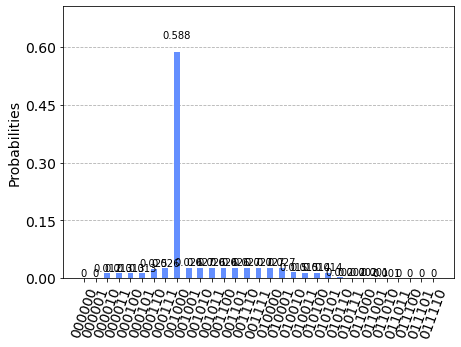

In [4]:
simulator = QasmSimulator()
cir.measure(B,creg)
cc = transpile(cir, simulator)
job = simulator.run(cc, shots=100000)
result = job.result()
counts = result.get_counts(cc)
plot_histogram(counts)